<a href="https://colab.research.google.com/github/AlexKos2023/Home_analis_total/blob/main/HW_total_analis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

"""
1. satisfaction_level - Уровень удовлетворенности работой (непрерывная)
2. last_evaluation - Время с момента последней оценки в годах (непрерывная)
3. number_project - Количество проектов, выполненных за время работы (дискретная/категориальная)
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц (непрерывная)
5. time_spend_company - Стаж работы в компании в годах (дискретная/категориальная)
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником (категориальная)
7. left - Уволился ли сотрудник (категориальная)
8. promotion_last_5years - Повышался ли сотрудник за последние пять лет (категориальная)
9. department - Отдел, в котором работает сотрудник (категориальная)
10. salary - Относительный уровень зарплаты (категориальная)
"""

'\n1. satisfaction_level - Уровень удовлетворенности работой (непрерывная)\n2. last_evaluation - Время с момента последней оценки в годах (непрерывная)\n3. number_project - Количество проектов, выполненных за время работы (дискретная/категориальная)\n4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц (непрерывная)\n5. time_spend_company - Стаж работы в компании в годах (дискретная/категориальная)\n6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником (категориальная)\n7. left - Уволился ли сотрудник (категориальная)\n8. promotion_last_5years - Повышался ли сотрудник за последние пять лет (категориальная)\n9. department - Отдел, в котором работает сотрудник (категориальная)\n10. salary - Относительный уровень зарплаты (категориальная)\n'

In [3]:
file_path = '/content/drive/My Drive/Копия HR.csv'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 2000)

In [31]:
df = pd.read_csv(file_path)
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years department  salary
0                0.38             0.53               2                   157                   3              0     1                      0      sales     low
1                0.80             0.86               5                   262                   6              0     1                      0      sales  medium
2                0.11             0.88               7                   272                   4              0     1                      0      sales  medium
3                0.72             0.87               5                   223                   5              0     1                      0      sales     low
4                0.37             0.52               2                   159                   3              0     1                      0      sales     low


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [21]:
print('Уникальных значений:\n')
unique_counts = df.nunique()
print(unique_counts)

Уникальных значений:

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
department                10
salary                     3
dtype: int64


In [46]:
print('Преобразование в категориальные')
columns_to_convert = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']

df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.astype('category'))

print(df.dtypes)

Преобразование в категориальные
satisfaction_level        float64
last_evaluation           float64
number_project           category
average_montly_hours        int64
time_spend_company       category
Work_accident            category
left                     category
promotion_last_5years    category
department               category
salary                   category
dtype: object


In [45]:
print('Статистика для непрерывных величин:\n')
continuous_columns = [
    'satisfaction_level',
    'last_evaluation',
    'average_montly_hours'
]
stats = df[continuous_columns].describe()
print(stats)

Статистика для непрерывных величин:

       satisfaction_level  last_evaluation  average_montly_hours
count        14999.000000     14999.000000          14999.000000
mean             0.612834         0.716102            201.050337
std              0.248631         0.171169             49.943099
min              0.090000         0.360000             96.000000
25%              0.440000         0.560000            156.000000
50%              0.640000         0.720000            200.000000
75%              0.820000         0.870000            245.000000
max              1.000000         1.000000            310.000000


In [47]:
print('Статистика для категориальных колонок:\n')
categorical_columns = [
    'number_project',
    'time_spend_company',
    'Work_accident',
    'left',
    'promotion_last_5years',
    'department',
    'salary',
]


categorical_stats = df[categorical_columns].describe(include='category')
print(categorical_stats)

Статистика для категориальных колонок:

        number_project  time_spend_company  Work_accident   left  promotion_last_5years department salary
count            14999               14999          14999  14999                  14999      14999  14999
unique               6                   8              2      2                      2         10      3
top                  4                   3              0      0                      0      sales    low
freq              4365                6443          12830  11428                  14680       4140   7316


In [83]:
df = pd.read_csv(file_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


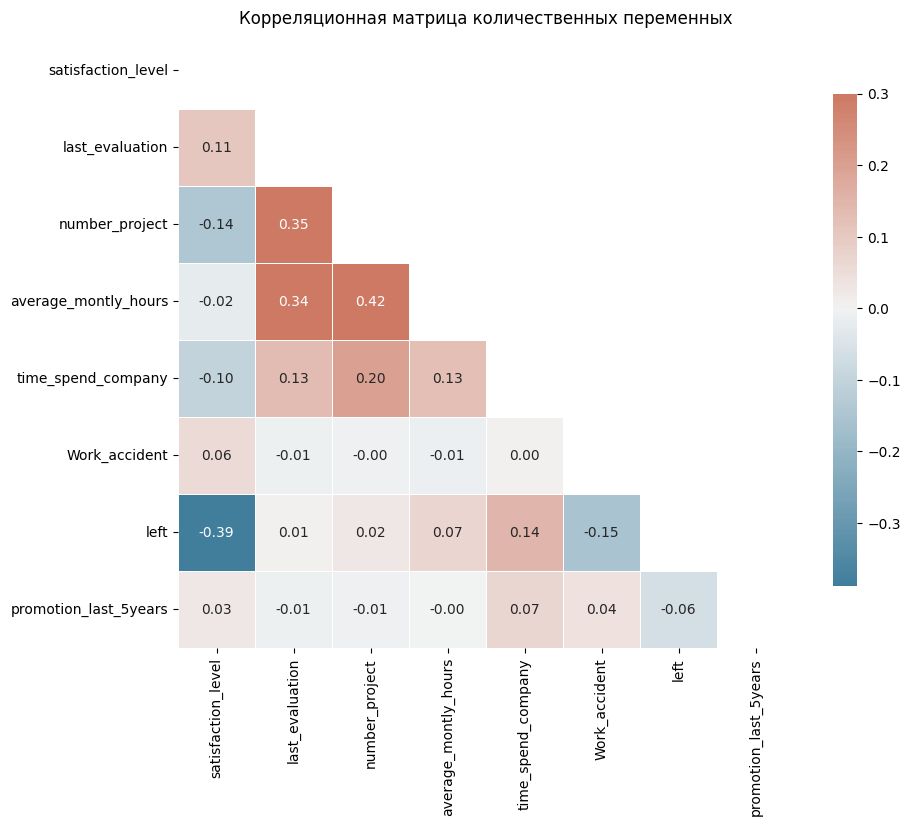

In [84]:
# Отбираем только количественные переменные
quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[quantitative_columns].corr()

# Создание маски для верхней части матрицы
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Создание цветовой схемы
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Визуализация корреляционной матрицы с помощью seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot=True, fmt=".2f",  # Дополнение значениями корреляции
            annot_kws={"size": 10})  # Размер шрифта

plt.title('Корреляционная матрица количественных переменных')
plt.show()


In [ ]:
"""
Две самые скоррелированные переменные:
1. average_monthly_hours - Среднее количество часов на рабочем месте в месяц к number_project - Количество проектов, выполненных за время работы
2. number_project - Количество проектов, выполненных за время работы к last_evaluation - Время с момента последней оценки в годах

Две наименее скоррелированные переменные:
1. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником к time_spend_company - Стаж работы в компании в годах
2. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником к number_project - Количество проектов, выполненных за время работы
"""

In [85]:
def count_employees_by_department(df):
    print('Работников в каждом департаменте\n')
    return df['department'].value_counts()

count_employees_by_department(df)

Работников в каждом департаменте



,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


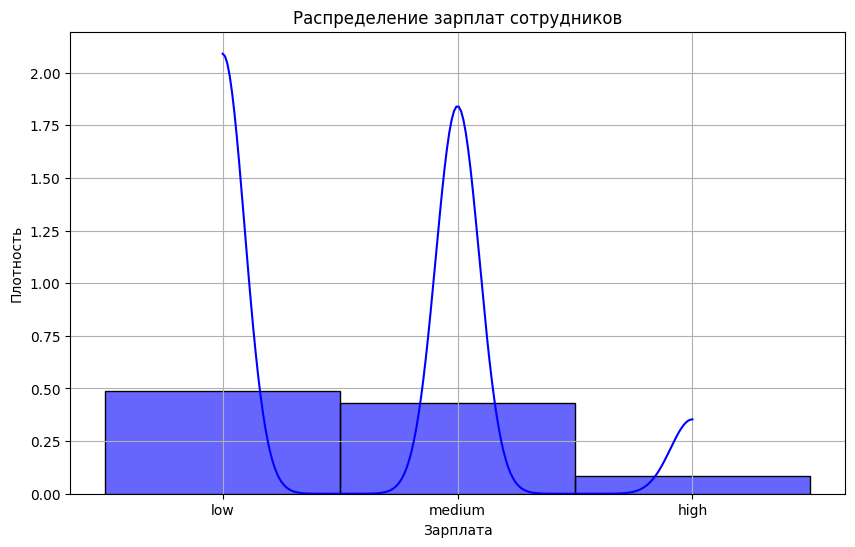

In [86]:
def plot_salary_distribution(df):
    plt.figure(figsize=(10, 6))

    # Гистограмма
    sns.histplot(df['salary'], bins=30, kde=True, color='blue', stat='density', alpha=0.6)

    # Параметры графика
    plt.title('Распределение зарплат сотрудников')
    plt.xlabel('Зарплата')
    plt.ylabel('Плотность')
    plt.grid(True)

    plt.show()

plot_salary_distribution(df)

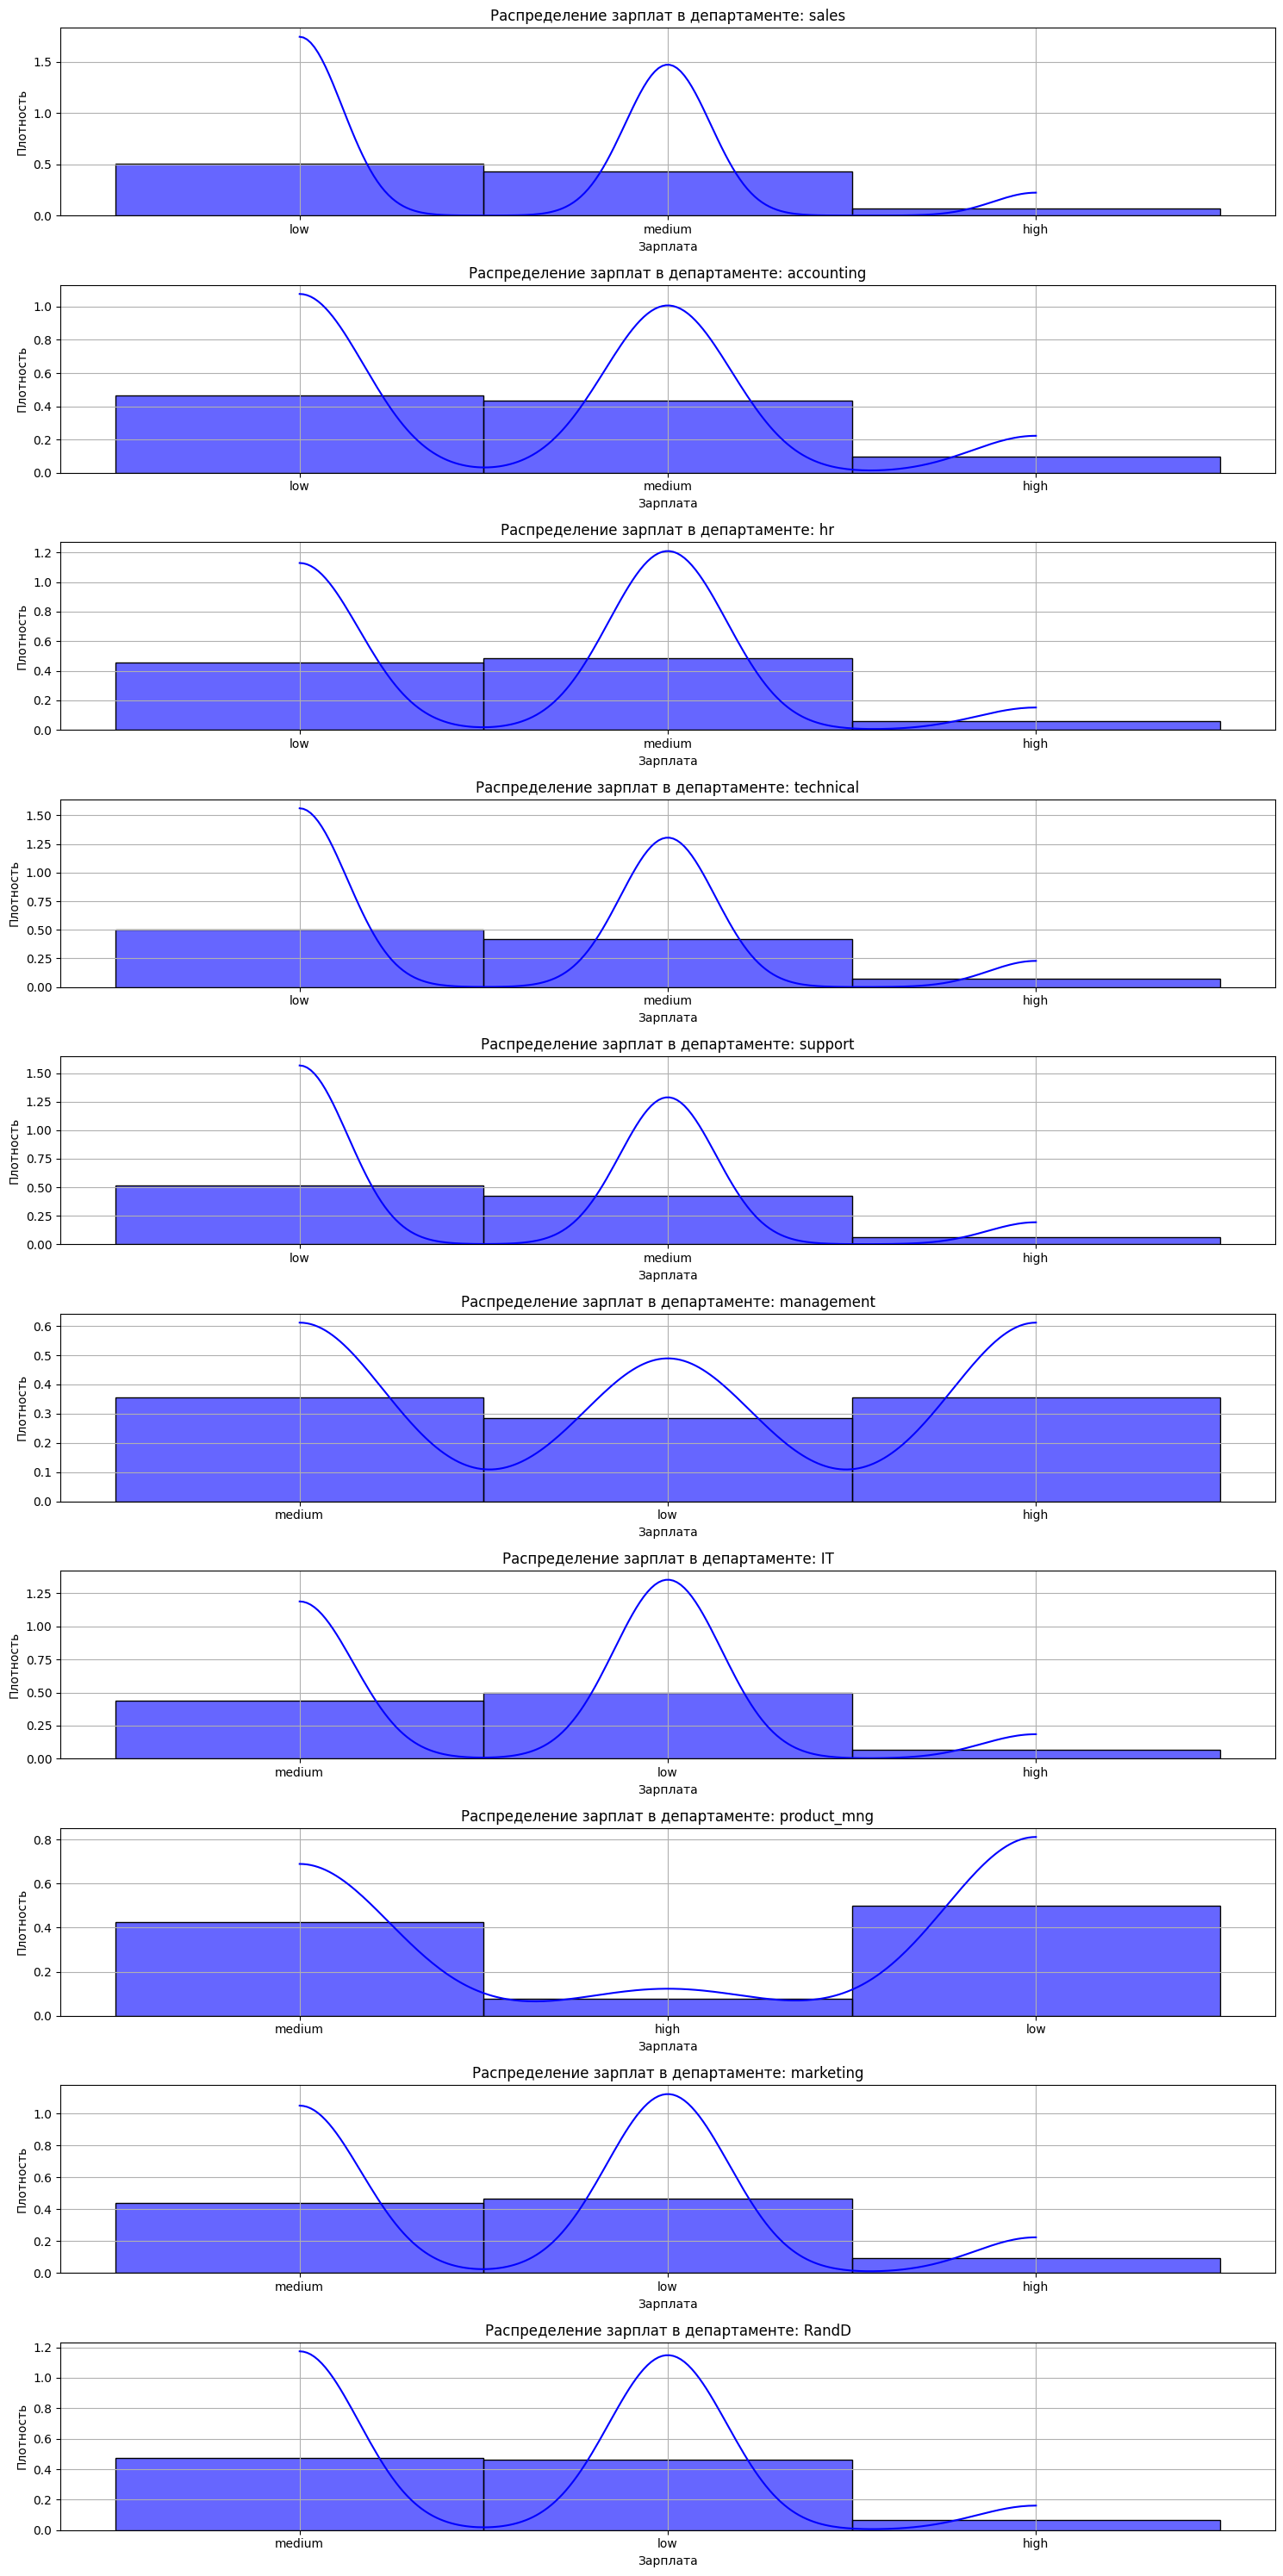

In [87]:
def plot_salary_distribution_by_department(df):

    unique_departments = df['department'].unique()
    n_departments = len(unique_departments)

    # Настройка размера графиков
    plt.figure(figsize=(15, n_departments * 3))

    for i, dept in enumerate(unique_departments):
        plt.subplot(n_departments, 1, i + 1)  # Подграфик для каждого департамента

        sns.histplot(df[df['department'] == dept]['salary'], bins=30, kde=True, color='blue', stat='density', alpha=0.6)


        plt.title(f'Распределение зарплат в департаменте: {dept}')
        plt.xlabel('Зарплата')
        plt.ylabel('Плотность')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_salary_distribution_by_department(df)



T-статистика: -0.7288680398062308, p-значение: 0.4661023478267259
Нет оснований отвергать нулевую гипотезу: Нет статистически значимой разницы во времени, проведенном на работе сотрудниками с высоким и низким окладом.


<ipython-input-90-a52d89238c62>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([low_salary_hours.dropna(), high_salary_hours.dropna()], labels=['Low Salary', 'High Salary'])


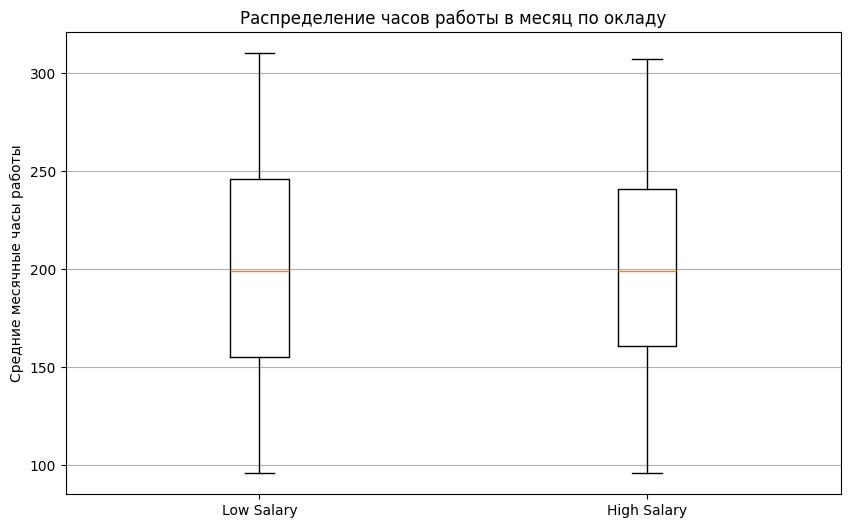

In [90]:
def analyze_work_hours_with_plot(df, salary_column='salary', hours_column='average_montly_hours'):
    # Фильтрация данных по окладу
    low_salary_hours = df[df[salary_column] == 'low'][hours_column]
    high_salary_hours = df[df[salary_column] == 'high'][hours_column]

    # Проводим t-тест
    t_statistic, p_value = stats.ttest_ind(high_salary_hours.dropna(), low_salary_hours.dropna())

    # Уровень значимости
    alpha = 0.05

    # Интерпретация результатов
    print(f"T-статистика: {t_statistic}, p-значение: {p_value}")

    if p_value < alpha:
        print("Отвергаем нулевую гипотезу: Сотрудники с высоким окладом действительно проводят на работе больше времени, чем сотрудники с низким окладом.")
    else:
        print("Нет оснований отвергать нулевую гипотезу: Нет статистически значимой разницы во времени, проведенном на работе сотрудниками с высоким и низким окладом.")

    # Строим график
    plt.figure(figsize=(10, 6))
    plt.boxplot([low_salary_hours.dropna(), high_salary_hours.dropna()], labels=['Low Salary', 'High Salary'])
    plt.title('Распределение часов работы в месяц по окладу')
    plt.ylabel('Средние месячные часы работы')
    plt.grid(axis='y')
    plt.show()


analyze_work_hours_with_plot(df)
